**Task 1.1: Initial Data Inspection**


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

Load Dataset

In [3]:
hotel_booking = pd.read_csv('/content/hotel_bookings.csv')

Display basic information about the dataset:
Shape of the dataset

In [4]:
print("Dataset Shape:", hotel_booking.shape)

Dataset Shape: (21950, 32)


Data types of each column

In [5]:
print(hotel_booking.dtypes)

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                            int64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

First and last 5 rows

In [6]:
print("\nFirst 5 rows:")
print(hotel_booking.head(10))


First 5 rows:
          hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0        342               2015               July   
1  Resort Hotel            0        737               2015               July   
2  Resort Hotel            0          7               2015               July   
3  Resort Hotel            0         13               2015               July   
4  Resort Hotel            0         14               2015               July   
5  Resort Hotel            0         14               2015               July   
6  Resort Hotel            0          0               2015               July   
7  Resort Hotel            0          9               2015               July   
8  Resort Hotel            1         85               2015               July   
9  Resort Hotel            1         75               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27        

Basic Statical Summary

In [7]:
display(hotel_booking.describe(include='all'))

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
count,21950,21950.000000,21950.000000,21950.000000,21950,21950.000000,21950.000000,21950.000000,21950.000000,21950.000000,...,21950,17311.000000,1842.000000,21950.000000,21950,21949.000000,21949.000000,21949.000000,21949,21949
unique,1,NaN,NaN,NaN,12,NaN,NaN,NaN,NaN,NaN,...,3,NaN,NaN,NaN,5,NaN,NaN,NaN,3,901
top,Resort Hotel,NaN,NaN,NaN,August,NaN,NaN,NaN,NaN,NaN,...,No Deposit,NaN,NaN,NaN,Transient,NaN,NaN,NaN,Check-Out,2016-02-09
freq,21950,NaN,NaN,NaN,2771,NaN,NaN,NaN,NaN,NaN,...,20164,NaN,NaN,NaN,17121,NaN,NaN,NaN,10864,145
mean,NaN,0.505011,101.529977,2015.829066,NaN,28.522551,15.629157,1.190524,3.171025,1.867426,...,NaN,214.659927,218.204126,0.718360,NaN,91.686536,0.091303,0.542530,NaN,NaN
std,NaN,0.499986,101.082346,0.746540,NaN,14.328740,8.929175,1.156315,2.475503,0.849090,...,NaN,84.537603,110.071344,8.567604,NaN,59.621463,0.289151,0.787047,NaN,NaN
min,NaN,0.000000,0.000000,2015.000000,NaN,1.000000,1.000000,0.000000,0.000000,0.000000,...,NaN,1.000000,9.000000,0.000000,NaN,-6.380000,0.000000,0.000000,NaN,NaN
25%,NaN,0.000000,15.000000,2015.000000,NaN,16.000000,8.000000,0.000000,1.000000,2.000000,...,NaN,208.000000,135.000000,0.000000,NaN,48.000000,0.000000,0.000000,NaN,NaN
50%,NaN,1.000000,69.000000,2016.000000,NaN,30.000000,16.000000,1.000000,3.000000,2.000000,...,NaN,240.000000,223.000000,0.000000,NaN,73.000000,0.000000,0.000000,NaN,NaN
75%,NaN,1.000000,168.000000,2016.000000,NaN,40.000000,24.000000,2.000000,5.000000,2.000000,...,NaN,241.000000,281.000000,0.000000,NaN,120.600000,0.000000,1.000000,NaN,NaN


**Task 1.2: Missing Value Analysis**


 Identify all columns with missing values & Calculate the percentage of missing values for each column

In [8]:
print("Missing Values Summary:")
missing_data = hotel_booking.isnull().sum()
missing_percent = (missing_data / len(hotel_booking)) * 100
missing_summary = pd.DataFrame({
    'Missing_Count': missing_data,
    'Missing_Percentage': missing_percent
}).sort_values('Missing_Count', ascending=False)
print(missing_summary[missing_summary['Missing_Count'] > 0])

Missing Values Summary:
                             Missing_Count  Missing_Percentage
company                              20108           91.608200
agent                                 4639           21.134396
country                                455            2.072893
adr                                      1            0.004556
total_of_special_requests                1            0.004556
reservation_status_date                  1            0.004556
reservation_status                       1            0.004556
required_car_parking_spaces              1            0.004556


Visualise missing value patterns using a heatmap

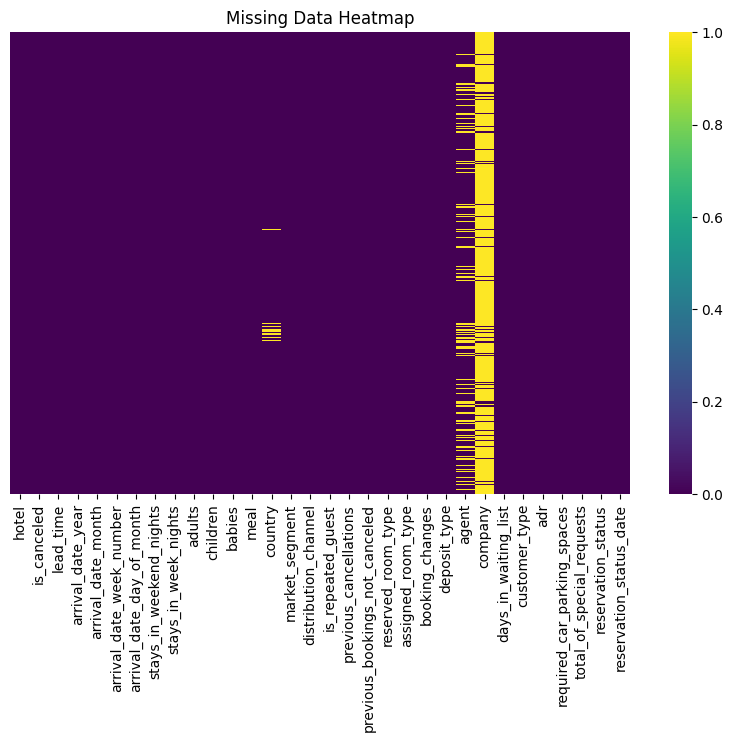

In [9]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
sns.heatmap(hotel_booking.isnull(), cbar=True, yticklabels=False, cmap='viridis')
plt.title('Missing Data Heatmap')
plt.show()

Analyze missing value patterns using a heatmap

In [10]:
def analyze_missing_patterns(df):
    """
    Analyze patterns of missing data to understand the mechanism
    """
    missing_data = df.isnull().sum()
    missing_percent = (missing_data / len(df)) * 100

    missing_table = pd.DataFrame({
        'Missing_Count': missing_data,
        'Missing_Percentage': missing_percent
    }).sort_values('Missing_Count', ascending=False)

    print("Missing Data Summary:")
    print(missing_table[missing_table['Missing_Count'] > 0])

    # Check if missing data is correlated
    print("\nMissing Data Correlation:")
    missing_corr = df.isnull().corr()
    print(missing_corr.stack()[missing_corr.abs().stack() > 0.1])

    return missing_table

missing_summary = analyze_missing_patterns(hotel_booking)

Missing Data Summary:
                             Missing_Count  Missing_Percentage
company                              20108           91.608200
agent                                 4639           21.134396
country                                455            2.072893
adr                                      1            0.004556
total_of_special_requests                1            0.004556
reservation_status_date                  1            0.004556
reservation_status                       1            0.004556
required_car_parking_spaces              1            0.004556

Missing Data Correlation:
country                      country                        1.000000
                             agent                          0.172966
                             company                       -0.142795
agent                        country                        0.172966
                             agent                          1.000000
                             company   

**Task 1.3: Data Quality Assessment**

Check duplicate records

In [11]:
print(f"\nDuplicate Records: {hotel_booking.duplicated().sum()}")




Duplicate Records: 4433


Identify potential outliers in numerical columns


In [12]:
print("\nNumerical Columns Summary:")
numerical_cols = hotel_booking.select_dtypes(include=[np.number]).columns
print(hotel_booking[numerical_cols].describe())


Numerical Columns Summary:
        is_canceled     lead_time  arrival_date_year  \
count  21950.000000  21950.000000       21950.000000   
mean       0.505011    101.529977        2015.829066   
std        0.499986    101.082346           0.746540   
min        0.000000      0.000000        2015.000000   
25%        0.000000     15.000000        2015.000000   
50%        1.000000     69.000000        2016.000000   
75%        1.000000    168.000000        2016.000000   
max        1.000000    737.000000        2017.000000   

       arrival_date_week_number  arrival_date_day_of_month  \
count              21950.000000               21950.000000   
mean                  28.522551                  15.629157   
std                   14.328740                   8.929175   
min                    1.000000                   1.000000   
25%                   16.000000                   8.000000   
50%                   30.000000                  16.000000   
75%                   40.000000  

Examine categorical variables for inconsistencies


In [13]:
print("\nCategorical Data Analysis:")
categorical_cols = hotel_booking.select_dtypes(include=['object']).columns

for col in categorical_cols:
    print(f"\n{col} - Unique Values ({hotel_booking[col].nunique()}):")
    value_counts = hotel_booking[col].value_counts()
    print(value_counts)

    # Check for potential inconsistencies (case sensitivity, extra spaces)
    unique_values = hotel_booking[col].dropna().unique()
    print(f"  Potential issues: {[val for val in unique_values if ' ' in str(val) or str(val) != str(val).strip()]}")



Categorical Data Analysis:

hotel - Unique Values (1):
hotel
Resort Hotel    21950
Name: count, dtype: int64
  Potential issues: ['Resort Hotel']

arrival_date_month - Unique Values (12):
arrival_date_month
August       2771
July         2626
October      2329
September    2252
February     1994
December     1689
March        1513
November     1462
May          1445
April        1445
June         1223
January      1201
Name: count, dtype: int64
  Potential issues: []

meal - Unique Values (5):
meal
BB           16062
HB            4613
FB             631
Undefined      610
SC              34
Name: count, dtype: int64
  Potential issues: []

country - Unique Values (102):
country
PRT    12109
GBR     2728
ESP     2140
IRL      948
FRA      628
       ...  
MUS        1
COM        1
SUR        1
UGA        1
BGR        1
Name: count, Length: 102, dtype: int64
  Potential issues: []

market_segment - Unique Values (6):
market_segment
Online TA        9642
Groups           3867
Offline TA

**Task 2.1: Handling Missing Values**

Handling Missing Values

In [14]:
def analyze_missing_patterns(df):
    """
    Analyze patterns of missing data to understand the mechanism
    """
    missing_data = df.isnull().sum()
    missing_percent = (missing_data / len(df)) * 100

    missing_table = pd.DataFrame({
        'Missing_Count': missing_data,
        'Missing_Percentage': missing_percent
    }).sort_values('Missing_Count', ascending=False)

    print("Missing Data Summary:")
    print(missing_table[missing_table['Missing_Count'] > 0])

    # Check if missing data is correlated
    print("\nMissing Data Correlation:")
    missing_corr = df.isnull().corr()

    return missing_table

missing_summary = analyze_missing_patterns(hotel_booking)


Missing Data Summary:
                             Missing_Count  Missing_Percentage
company                              20108           91.608200
agent                                 4639           21.134396
country                                455            2.072893
adr                                      1            0.004556
total_of_special_requests                1            0.004556
reservation_status_date                  1            0.004556
reservation_status                       1            0.004556
required_car_parking_spaces              1            0.004556

Missing Data Correlation:


**Task 2.2: Duplicate Detection and Removal**

Identify exact duplicates

In [18]:
print(f"Duplicates before: {hotel_booking.duplicated().sum()}")
hotel_booking = hotel_booking.drop_duplicates()
print(f"After: {hotel_booking.duplicated().sum()}")

Duplicates before: 4433
After: 0


Find near-duplicates

In [24]:
def remove_outliers_iqr(df, column):
    Q1 = hotel_booking[column].quantile(0.25)
    Q3 = hotel_booking[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return hotel_booking[(hotel_booking[column] >= lower) & (hotel_booking[column] <= upper)]

# Apply to adr
hotel_booking = remove_outliers_iqr(hotel_booking, 'adr')

 Document the number of duplicates removed

In [31]:
hotel_booking_cleaned = hotel_booking.drop_duplicates()
print("Duplicates removed:", hotel_booking.shape[0] - hotel_booking_cleaned.shape[0])

Duplicates removed: 0


**Task 2.3: Outlier Detection and Treatment**

Use the IQR method for outlier detection

In [32]:
from scipy import stats

outlier_cols = ['lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights',
                'adults', 'children', 'babies', 'adr']

Apply z-score analysis

In [34]:
Q1 = hotel_booking_cleaned['adr'].quantile(0.25)
Q3 = hotel_booking_cleaned['adr'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

Create boxplots for visualisation

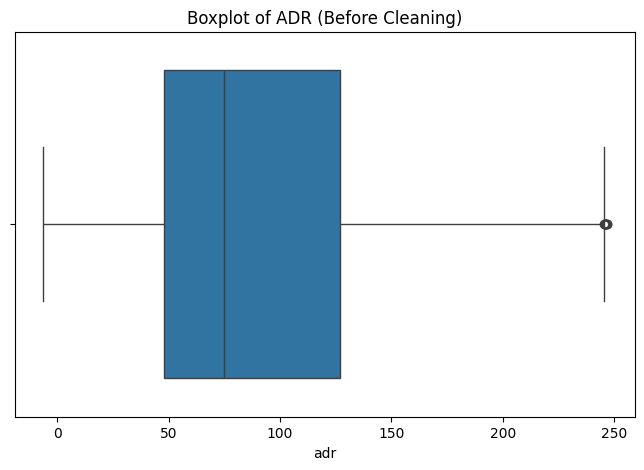

In [35]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=hotel_booking['adr'])
plt.title("Boxplot of ADR (Before Cleaning)")
plt.show()

**Task 2.4: Data Inconsistency Fixes**

 Fix date format inconsistencies

In [36]:
df = hotel_booking[~((hotel_booking['adults'] == 0) & (hotel_booking['children'] == 0) & (hotel_booking['babies'] == 0))]

# Standardize date format (if applicable)
hotel_booking['reservation_status_date'] = pd.to_datetime(hotel_booking['reservation_status_date'])

Handle impossible combinations

In [37]:
df_cleaned = hotel_booking_cleaned[~((hotel_booking_cleaned['adults'] == 0) & (hotel_booking_cleaned['children'] == 0) & (hotel_booking_cleaned['babies'] == 0))]

**Task 3.1: Data Integrity Checks**

Data Integrity Check

In [38]:
# Guests > 0
assert (df['adults'] + df['children'] + df['babies']).min() > 0

# Date range check
print(df['arrival_date_year'].value_counts())

# Reasonable ranges
print(df[['lead_time', 'adr']].describe())


arrival_date_year
2016    6853
2015    6709
2017    3504
Name: count, dtype: int64
          lead_time           adr
count  17066.000000  17066.000000
mean      87.209364     91.777129
std       95.067321     56.142194
min        0.000000     -6.380000
25%        9.000000     48.000000
50%       51.000000     75.000000
75%      142.000000    127.000000
max      737.000000    246.670000


**Task 3.3: Final Dataset Preparation**

Final Dataset Preparation

In [39]:
hotel_booking.to_csv('/content/hotel_bookings.csv', index=False)

data_dict = pd.DataFrame({
    'Column Name': hotel_booking.columns,
    'Description': ['Add descriptions here...'] * len(hotel_booking.columns),
    'Data Type': hotel_booking.dtypes.astype(str).values
})
data_dict.to_csv('/content/hotel_bookings.csv', index=False)

In [40]:
# Final cleaned dataset
# Optional: rename or reset index if needed
df_cleaned = df.copy()
df_cleaned.reset_index(drop=True, inplace=True)

In [42]:
# Export to CSV
df_cleaned.to_csv('/content/hotel_bookings_cleaned.csv', index=False)

# For Colab users: Download the file
from google.colab import files
files.download('/content/hotel_bookings_cleaned.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>